In [115]:
# #!pip install modestga --upgrade --quiet
# #!pip install deap --upgrade --quiet

# import warnings
# warnings.filterwarnings("ignore")

In [116]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [117]:
"""Interpolation Funktions"""
# returns coefficients (polynominal and log-curve-fitting) or spline function

# Polynominal (1 to degree)
def polynomial_fit(x, y, degree):
    return np.polyfit(x, y, degree)

# logarithmic polynominal (1 to 4), but for curve fitting
    # functions for curve fitting
def poly_log_1_logarithmic_function(x_log, a, b):
    return a * x_log + b

def poly_log_2_logarithmic_function(x_log, a, b, c):
    return (a * x_log + b)*x_log + c

def poly_log_3_logarithmic_function(x_log, a, b, c, d):
    return ((a * x_log + b)*x_log + c) * x_log + d

def poly_log_4_logarithmic_function(x_log, a, b, c, d, e):
    return (((a * x_log + b)*x_log + c) * x_log + d) * x_log + e

    # curve fitting is done here
from scipy.optimize import curve_fit
def log_fitting_coefficients(x_values, y_values, logarithmic_function):
    coeff, _ = curve_fit(logarithmic_function, x_values, y_values)
    return coeff
 
# spline interpolation
from scipy.interpolate import CubicSpline, interp1d

def spline_fitting_linear(x_values, y_values):
    return interp1d(x_values, y_values, kind='linear')

def spline_fitting_quadratic(x_values, y_values):
    return interp1d(x_values, y_values, kind='quadratic')
 
def spline_fitting_cubic(x_values, y_values):
    return CubicSpline(x_values, y_values)

In [118]:
"""Estimations for MSE"""
# returns estimations for y_value through different fittings

# polynominal
def polynominal_estimation(x, coefficients):
    return np.polyval(coefficients, x)

# log
def log_fitting_estimates(x_values, coefficients):
    if len(coefficients)<2 or len(coefficients)>5:
        return NotImplementedError("length of coefficients don't match any function")
    else:
        log_function_dict = {
            2: poly_log_1_logarithmic_function, 
            3: poly_log_2_logarithmic_function, 
            4: poly_log_3_logarithmic_function,
            5: poly_log_4_logarithmic_function}
        
        return np.array(log_function_dict[len(coefficients)](x_values, *coefficients))

# spline
def spline_fitting_estimates(x_values, spline_function):
    return spline_function(x_values)


In [119]:
"""calculating and comparing mean square error"""
# returns a dict with the min_mse, best method, coefficients of the method and function of the method

def comparing_fitting_methods(x_values, x_log, y_values):
    # log_function_dict = {
    #     2: poly_log_1_logarithmic_function, 
    #     3: poly_log_2_logarithmic_function, 
    #     4: poly_log_3_logarithmic_function,
    #     5: poly_log_4_logarithmic_function}
    
    comparing_dict = {'mse': np.empty(11), 
                      'method': [None] * 11, 
                      'coefficients': [None] * 11, 
                      'function': [None] * 11}
    
    
    for i in range(5):
        comparing_dict['method'][i-1] = polynomial_fit.__name__ + str(i)
        comparing_dict['coefficients'][i-1] = polynomial_fit(x_values, y_values, i)
        comparing_dict['function'][i-1] = polynominal_estimation
        comparing_dict['mse'][i-1] = mean_squared_error(y_values, polynominal_estimation(x_values, comparing_dict['coefficients'][i-1]))
        
        # log_function = log_function_dict[i+1]
        # comparing_dict['method'][i+4] = log_function.__name__
        # comparing_dict['coefficients'][i+4] = log_fitting_coefficients(x_log, y_values, log_function)
        # comparing_dict['function'][i+4] = log_function
        # comparing_dict['mse'][i+4] = mean_squared_error(y_values, log_fitting_estimates(x_log, log_function))
      
    # comparing_dict['method'][8] = spline_fitting_linear.__name__
    # comparing_dict['coefficients'][8] = None
    # comparing_dict['function'][8] = spline_fitting_linear(x_values, y_values)
    # comparing_dict['mse'][8] = mean_squared_error(y_values, comparing_dict['function'][8](x_values))
        
    # comparing_dict['method'][9] = spline_fitting_quadratic.__name__
    # comparing_dict['coefficients'][9] = None
    # comparing_dict['function'][9] = spline_fitting_quadratic(x_values, y_values)
    # comparing_dict['mse'][9] = mean_squared_error(y_values, comparing_dict['function'][9](x_values))
        
    comparing_dict['method'][5] = spline_fitting_cubic.__name__
    comparing_dict['coefficients'][5] = None
    comparing_dict['function'][5] = spline_fitting_cubic(x_values, y_values)
    comparing_dict['mse'][5] = mean_squared_error(y_values, comparing_dict['function'][5](x_values))
    
    
    min_mse_index = np.argmin(comparing_dict['mse'])
    return {
        'min_mse': comparing_dict['mse'][min_mse_index], 
        'method': comparing_dict['method'][min_mse_index], 
        'coefficients': comparing_dict['coefficients'][min_mse_index], 
        'best_function': comparing_dict['function'][min_mse_index]}

In [120]:
"""
Init
"""

#===========================================================
#                   Read Files
#===========================================================
def read_data():
# Files
    file = pd.ExcelFile('Result-test.xlsx')

    # Nodeproperty
    df_node_property = pd.read_excel(file, 'Node_Property')
    node_names_node_property = df_node_property['Node Name'].values
    memory_values = df_node_property['Memory'].values
    tsk_values = df_node_property['tsk'].values

    # Values
    df_general_results = pd.read_excel(file, 'General-Results')
    node_names_general_results = df_node_property['Node Name'].values

#===========================================================
#                   Initializing Variables
#===========================================================

# Genom Variable
    genomes_df= pd.read_csv('overview-test.csv')

    nodenames = np.unique(node_names_node_property)
    genome_names = genomes_df['GenomeName'].values
    number_of_gens = len(genome_names)
    size_of_genes = genomes_df['Size'].values
    Job_max = number_of_gens
    
    return (df_general_results,
            node_names_node_property, 
            memory_values, tsk_values, 
            node_names_general_results, 
            nodenames, 
            genome_names,
            size_of_genes,
            Job_max)

# Genetic Algorithm parameters
population_number=20
MutationRate= 0.4
CrossoverRate= 1 - MutationRate
maxIter = 120
MutationNumber = round (population_number* MutationRate)
CrossoverNumber = round (population_number * CrossoverRate)

In [121]:

"""
overall Functions
"""
# def sol(df_general_results):
#     Solutions_polynominal = {}
#     Solutions_logarithmic = {}
#     Solutions_spline = {}

#     for name in nodenames:
#         df = df_general_results[df_general_results['Node Name'] == name]
#         x_values = df['Data Size'].values
#         y_values = df['Total-time'].values
        
#         unique_x, unique_indices = np.unique(x_values, return_index=True)
#         unique_y = y_values[unique_indices]

#         sorted_indices = np.argsort(unique_x)
#         x_sorted = unique_x[sorted_indices]
#         y_sorted = unique_y[sorted_indices]
#         Solutions_spline[name] = spline_fitting(x_sorted, y_sorted)
#         Solutions_logarithmic[name] = log_fitting(x_sorted, y_sorted)
#         Solutions_polynominal[name] = polynominal_fitting(x_sorted, y_sorted)
    
#     return Solutions_polynominal, Solutions_logarithmic, Solutions_spline


'\noverall Functions\n'

In [122]:
import matplotlib.pyplot as plt
def plot_data_and_fitted_functions(x_values, y_values, best_function, title):
    # Create a figure and axis for plotting
    fig, ax = plt.subplots()

    # Plot the data points
    ax.scatter(x_values, y_values, label="Data Points", color='b', marker='o')

    # Evaluate the fitted function on a range of x-values
    x_range = np.linspace(min(x_values), max(x_values), 100)
    y_range = best_function(x_range)

    # Plot the fitted function
    ax.plot(x_range, y_range, label="Fitted Function", color='r')

    # Set labels and title
    ax.set_xlabel("X Values")
    ax.set_ylabel("Y Values")
    ax.set_title(title)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

Node Name: 201
Best Fitting Method: spline_fitting_cubic
Optimized Coefficients: None
Fitted Function: <scipy.interpolate._cubic.CubicSpline object at 0x124812270>


Spline Coefficients: [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -6.9388939e-18]
 [ 4.0000000e-02  4.0000000e-02  4.0000000e-02  4.0000000e-02]
 [ 4.7000000e+00  4.7400000e+00  4.7800000e+00  4.8200000e+00]]




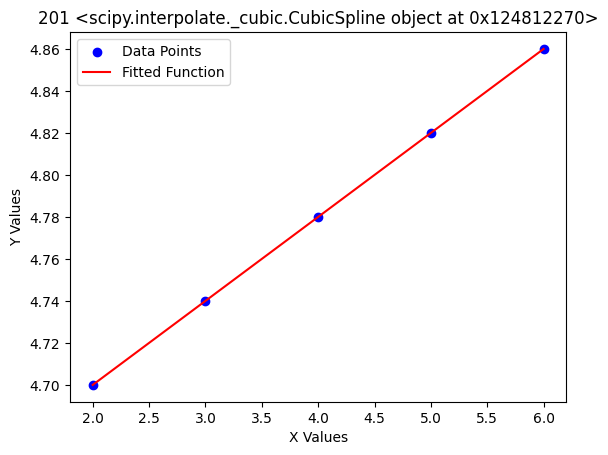

Node Name: 202
Best Fitting Method: spline_fitting_cubic
Optimized Coefficients: None
Fitted Function: <scipy.interpolate._cubic.CubicSpline object at 0x124813650>


Spline Coefficients: [[ 0.01041667  0.01041667  0.00791667  0.00791667]
 [-0.11625    -0.085      -0.05375    -0.03      ]
 [ 0.80583333  0.60458333  0.46583333  0.38208333]
 [ 1.6         2.3         2.83        3.25      ]]




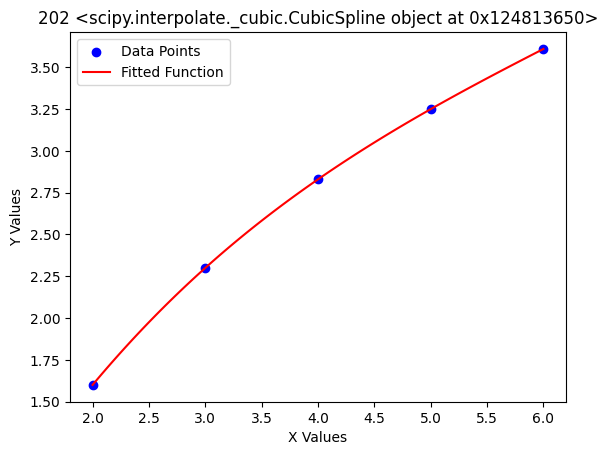

Node Name: 203
Best Fitting Method: spline_fitting_cubic
Optimized Coefficients: None
Fitted Function: <scipy.interpolate._cubic.CubicSpline object at 0x1246b7d10>


Spline Coefficients: [[ 0.01208333  0.01208333  0.00958333  0.00958333]
 [-0.14125    -0.105      -0.06875    -0.04      ]
 [ 1.06916667  0.82291667  0.64916667  0.54041667]
 [ 3.61        4.55        5.28        5.87      ]]




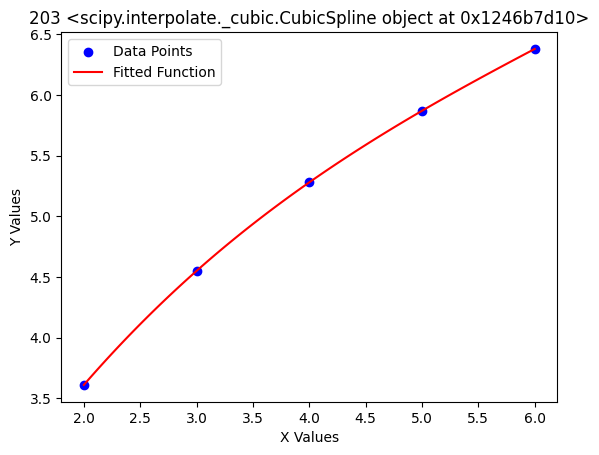

In [123]:
def test_function():
    import inspect
    (df_general_results,
        node_names_node_property, 
        memory_values, tsk_values, 
        node_names_general_results, 
        nodenames, 
        genome_names,
        size_of_genes,
        Job_max) = read_data()
    
    test_dict = {}
    
    for name in nodenames:
        df = df_general_results[df_general_results['Node Name'] == name]
        x_values = df['Data Size'].values
        y_values = df['Total-time'].values
        unique_x, unique_indices = np.unique(x_values, return_index=True)
        unique_y = y_values[unique_indices]

        sorted_indices = np.argsort(unique_x)
        x_sorted = unique_x[sorted_indices]
        y_sorted = unique_y[sorted_indices]
        test_dict[name] = comparing_fitting_methods(x_sorted, np.log(x_sorted), y_sorted)
        

        
        print(f"Node Name: {name}")
        print(f"Best Fitting Method: {test_dict[name]['method']}")
        print(f"Optimized Coefficients: {test_dict[name]['coefficients']}")
        print(f"Fitted Function: {test_dict[name]['best_function']}")
        
        print('\n')
        
        if 'spline' in test_dict[name]['method'].lower():
            spline_function = test_dict[name]['best_function']
            if 'cubic' in test_dict[name]['method'].lower():
                coefficients = spline_function.c
                print(f"Spline Coefficients: {coefficients}")
                print('\n')
        
        titel = str(name) + ' ' + str(test_dict[name]['best_function'])
        plot_data_and_fitted_functions(x_sorted, y_sorted, test_dict[name]['best_function'], titel)

        
        


test_function()
    
    